In [17]:
import sys
sys.path.append('../')
sys.path.append('../code')
import graph_metrics2 as gm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats
from scipy import optimize
import entropy_estimators as ee
import fit

import warnings
warnings.filterwarnings("ignore")

In [19]:
df = pd.read_csv("../../data/secret/all_world_indices_dfgen5.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

df = df["2008":"2009"]

In [20]:
def MI(s1, s2):
    l = len(s1)
    v1 = s1.reshape(l, 1)
    v2 = s2.reshape(l, 1)
    return ee.mi(v1, v2)

def MIcorr2dist(corr):
    maxx = 2
    t = 2*(maxx-corr)
    return np.where(t>0, np.sqrt(t), 0)

def compute_MIMSTL(period):
    dist = MIcorr2dist(period.corr(method=MI))
    mstree = scipy.sparse.csgraph.minimum_spanning_tree(dist).toarray()
    N = period.shape[1]
    return np.sum(mstree) / (N - 1)

def compute_MMI(period):
    dist = MIcorr2dist(period.corr(method=MI))
    return np.mean(dist)

def compute_AGGC(period, p=0.6):
    dist = MIcorr2dist(period.corr(method=MI))
    treshold = np.quantile(dist, p)
    graph = np.where(dist < treshold, dist, 0)
    G = nx.from_numpy_matrix(graph)
    transitivity = nx.transitivity(G)
    # print(transitivity)
    return transitivity

def compute_AGGEC(period, p=0.6):
    dist = MIcorr2dist(period.corr(method=MI))
    treshold = np.quantile(dist, p)
    graph = np.where(dist < treshold, dist, 0)
    G = nx.from_numpy_matrix(graph)
    clust_vals = list(nx.algorithms.centrality.eigenvector_centrality(G, weight="weight").values())
    return float(np.mean(clust_vals))

In [21]:
# df.groupby(pd.Grouper(freq="M")).apply(compute_MIMSTL).plot()

In [32]:
model = fit.VolatilityModel(
    path="../../data/topsecret/data251019_ret_diarios.csv",
    periodstart="2001-07",
    periodend="2019-09",
    droptickers=["IGBC"],
    save_table=False,
    visualisation=True,
)

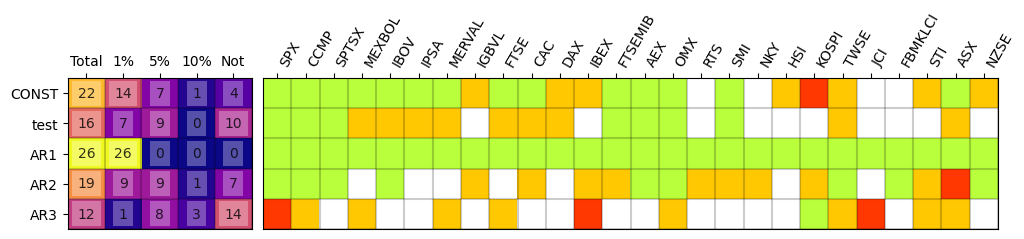

In [33]:
data = model.test(
    metricdic={
        "test":(lambda x: gm.compute_AGGEC(x, p=0.6), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

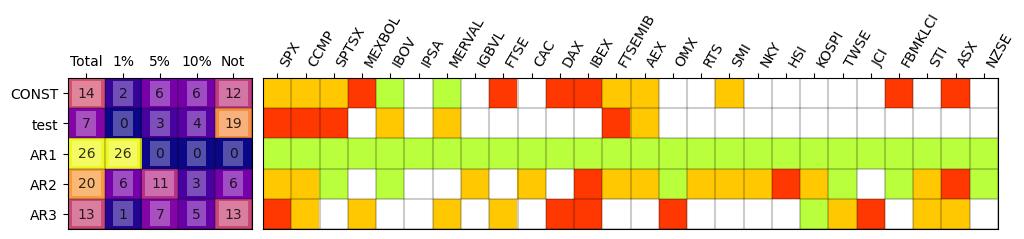

In [34]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.6), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

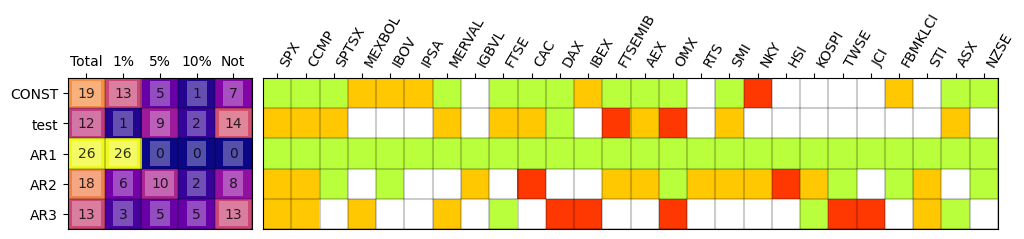

In [35]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.4), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

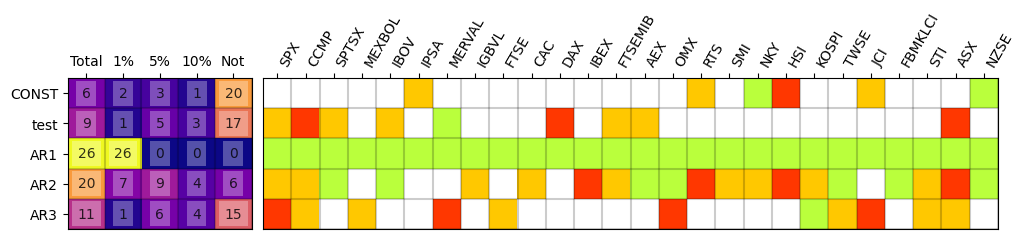

In [36]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGC(x, p=0.6), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

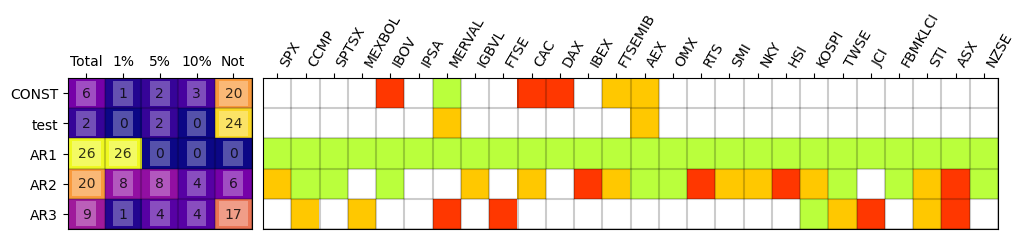

In [39]:
data = model.test(
    metricdic={
        "test":(compute_MMI, "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

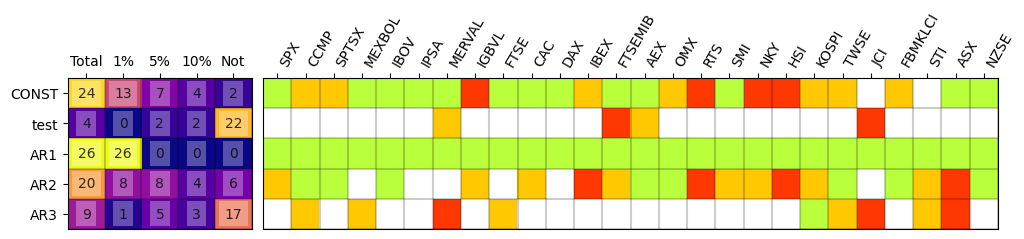

In [40]:
data = model.test(
    metricdic={
        "test":(compute_MIMSTL, "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

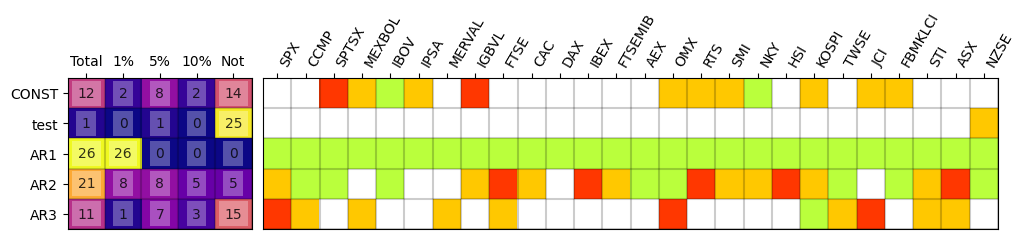

In [41]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.1), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

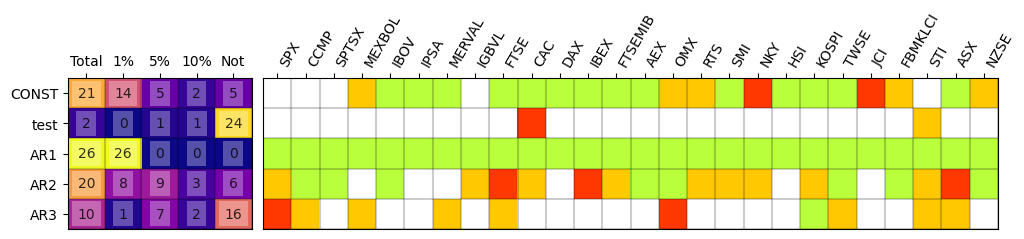

In [42]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.2), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

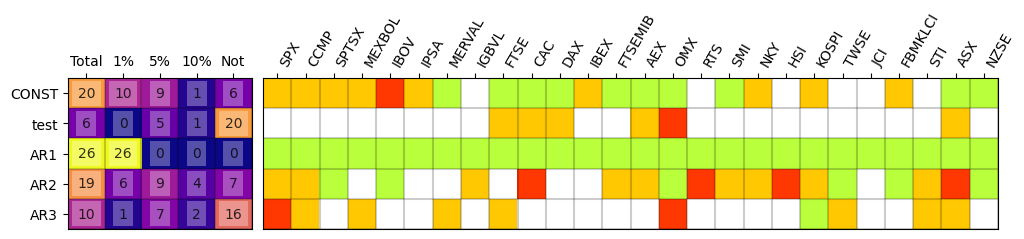

In [43]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.3), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

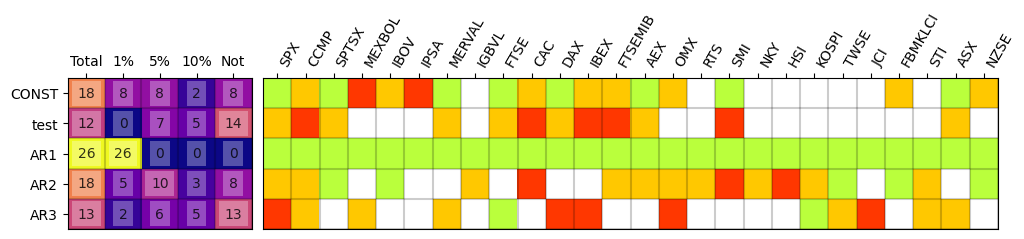

In [44]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.5), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

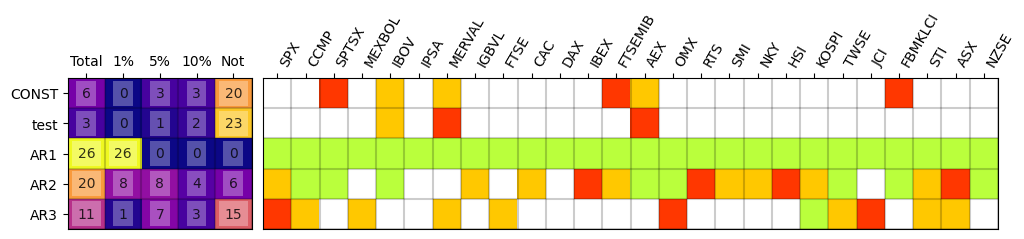

In [45]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.7), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

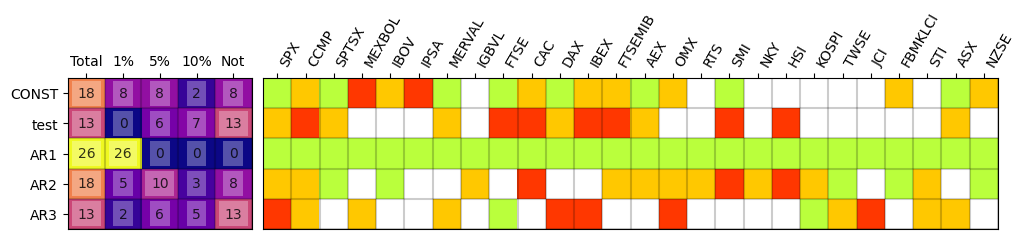

In [46]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.5), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

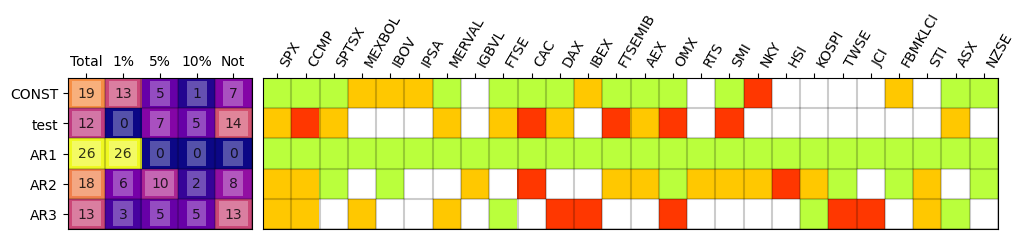

In [47]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.4), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)

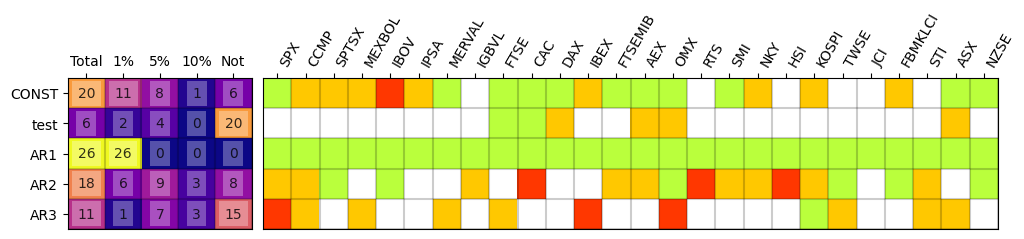

In [48]:
data = model.test(
    metricdic={
        "test":(lambda x: compute_AGGEC(x, p=0.3), "none"),
    },
    benchmark="AR3",
    only_is=True, 
)